#                                                   MNIST Data


![alt text](https://cdn-images-1.medium.com/max/479/1*yBdJCRwIJGoM7pwU-LNW6Q.png)

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixel is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

[Dataset Link] :https://www.kaggle.com/c/digit-recognizer/data

In [3]:
#Imports
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Reading data from file
df = pd.read_csv("./train.csv")
#Printing first 5 rows of data
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(df.shape)
#Statistical information of each column of the data
df.describe()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [6]:
#Saving label column in a new array
labels = df['label']
#Dropping label from the df Dataframe
df = df.drop('label',axis=1)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


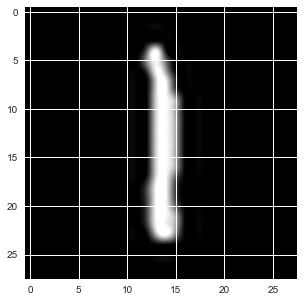

1


In [7]:
#display a number
plt.figure(figsize=(5,5))
index =1000

#pulling whole row of data and converting it into matrix of 28 x 28
grid_data = df.iloc[index].as_matrix().reshape(28,28)#reshape from 1D to 2D

#Diplaying input data in pixels as image
plt.imshow(grid_data,interpolation="lanczos",cmap="gray")
plt.show()

#Actual number as output
print(labels[index])


## 2D Visualization using PCA

In [8]:
#Data Prepocessing: Column Standardization
#Converting data such that mean=0 and variance=1 Centering and scaling happens independently on each feature by 
#computing the relevent statistics in the training dataset. Mean and std dev is stored for later use when we use fit
from sklearn.preprocessing import StandardScaler
std_data = StandardScaler().fit_transform(df)
print("Dimension of the data: ",std_data.shape)

Dimension of the data:  (42000, 784)


In [7]:
#Converted the data to covariance matrix
cov_matrix = np.matmul(std_data.T,std_data) 

print("Dimension of the Co-Variance Matrix: ",cov_matrix.shape)

Dimension of the Co-Variance Matrix:  (784, 784)


In [8]:
from scipy.linalg import eigh
#Calculating the top 2 eigen values and eigen vectors of the covariance matrix for visualization in 2D
#Eigen value will here will give the directions of the two maximal variance
values , vectors = eigh(cov_matrix,eigvals=[782,783])
print("Top 2 Eigen Values: ",values)
print("Dimension of the Eigen Vectors: ",vectors.shape)

Top 2 Eigen Values:  [ 1222652.44613786  1709211.41082575]
Dimension of the Eigen Vectors:  (784, 2)


In [9]:
#Transforming the co-ordinates to new set of co-ordinates Principal Components
#Projecting the points onto the top two eigen vectors
new_coordinates = np.matmul(std_data,vectors)
print(new_coordinates.shape)

labels = labels[:,np.newaxis]
#labels.shape = np.reshape(labels, (-1, 2))
print(labels.shape)

(42000, 2)
(42000, 1)


In [10]:
#Merging the data with labels
newcoordinates = np.concatenate((new_coordinates,labels),axis=1)
print(newcoordinates.shape)
newcoordinates

(42000, 3)


array([[ -5.2264454 ,  -5.14047772,   1.        ],
       [  6.03299601,  19.29233234,   0.        ],
       [ -1.70581328,  -7.64450341,   1.        ],
       ..., 
       [  7.07627667,   0.49539137,   7.        ],
       [ -4.34451279,   2.30724011,   6.        ],
       [  1.55912058,  -4.80767022,   9.        ]])

In [11]:
df = pd.DataFrame(data=newcoordinates,columns=["1st_principal", "2nd_principal", "label"])
df.head()

,1st_principal,2nd_principal,label
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0


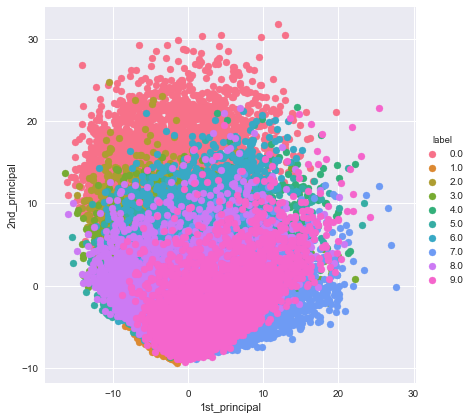

In [12]:
#Plotting the Principal Components
sns.FacetGrid(df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

Visualizaion of 784 dimension data into 2 dimension using PCA

## PCA using Scikit-learn Library

In [13]:
from sklearn import decomposition
pca = decomposition.PCA()

In [14]:
#Top two eigen vectors and eigen values for visualization in 2D
pca.n_components = 2
#Transforming the co-ordinates to new set of co-ordinates Principal Components
#Doing all the calculations internally like covariance matrix and eigen vectors
pca_data = pca.fit_transform(std_data)
pca_data.shape

(42000, 2)

In [15]:
#Merging the data with labels
new_data = np.concatenate((pca_data,labels),axis=1)
new_data.shape
df = pd.DataFrame(new_data,columns=["1st_principal", "2nd_principal", "label"])

In [16]:
df.head()

,1st_principal,2nd_principal,label
0,-5.140576,-5.226517,1.0
1,19.292272,6.032786,0.0
2,-7.644450,-1.705761,1.0
3,-0.474131,5.836486,4.0
4,26.559477,6.024311,0.0


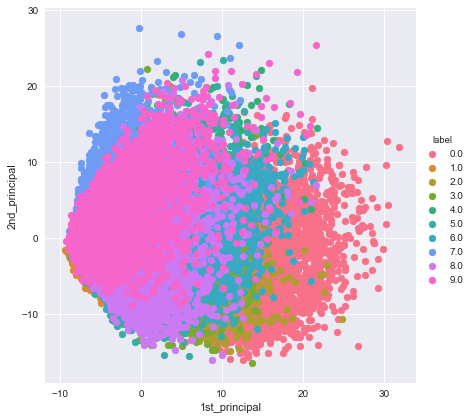

In [17]:
#Plotting the Principal Components
sns.FacetGrid(df,hue="label",size=6).map(plt.scatter,'1st_principal', '2nd_principal').add_legend()
plt.show()

PCA do not wonderful job in 2D visulalization for the following dataset as it is having 784 dimensions

## PCA for dimensionality reduction (non-visualization)

In [18]:

pca.n_components = 784
pca.fit_transform(std_data)
#Eigen values
pca.explained_variance_.shape

(784,)

In [19]:
#Percentage of variance explained(Eigen Value) by the Eigen Vector
pca_explained_sum = pca.explained_variance_/np.sum(pca.explained_variance_)
print(pca_explained_sum)

[  5.74795336e-02   4.11169103e-02   3.78286715e-02   2.93986212e-02
   2.55643921e-02   2.22984433e-02   1.95255247e-02   1.77160531e-02
   1.56266017e-02   1.42495571e-02   1.36100884e-02   1.22254076e-02
   1.13573634e-02   1.11309029e-02   1.05031053e-02   1.01232575e-02
   9.51302738e-03   9.34514435e-03   9.07258876e-03   8.85327331e-03
   8.38907114e-03   8.12027039e-03   7.75160752e-03   7.52311857e-03
   7.27690355e-03   6.98755959e-03   6.90454706e-03   6.64923638e-03
   6.30675038e-03   6.16301289e-03   6.10922106e-03   5.97037089e-03
   5.77283590e-03   5.73682340e-03   5.64821911e-03   5.46321734e-03
   5.39430432e-03   5.24361113e-03   5.04843259e-03   4.88530211e-03
   4.82243943e-03   4.75900896e-03   4.60007666e-03   4.57628685e-03
   4.49583855e-03   4.46721905e-03   4.43836948e-03   4.36836795e-03
   4.32712937e-03   4.27026938e-03   4.19269307e-03   4.12180430e-03
   4.02460610e-03   3.99434033e-03   3.94891257e-03   3.90805004e-03
   3.79898634e-03   3.72453760e-03

In [20]:
#Cumulative Sum of percentage of variance explained (Eigen Values)
pca_explained_cumsum = np.cumsum(pca_explained_sum)
pca_explained_cumsum

array([ 0.05747953,  0.09859644,  0.13642512,  0.16582374,  0.19138813,
        0.21368657,  0.2332121 ,  0.25092815,  0.26655475,  0.28080431,
        0.2944144 ,  0.3066398 ,  0.31799717,  0.32912807,  0.33963118,
        0.34975443,  0.35926746,  0.36861261,  0.37768519,  0.38653847,
        0.39492754,  0.40304781,  0.41079942,  0.41832254,  0.42559944,
        0.432587  ,  0.43949155,  0.44614078,  0.45244753,  0.45861055,
        0.46471977,  0.47069014,  0.47646297,  0.4821998 ,  0.48784802,
        0.49331123,  0.49870554,  0.50394915,  0.50899758,  0.51388288,
        0.51870532,  0.52346433,  0.52806441,  0.53264069,  0.53713653,
        0.54160375,  0.54604212,  0.55041049,  0.55473762,  0.55900789,
        0.56320058,  0.56732239,  0.57134699,  0.57534133,  0.57929025,
        0.5831983 ,  0.58699728,  0.59072182,  0.59440595,  0.59806318,
        0.60159596,  0.60510684,  0.60856097,  0.61197491,  0.61535276,
        0.61871752,  0.62203462,  0.62533187,  0.62853203,  0.63

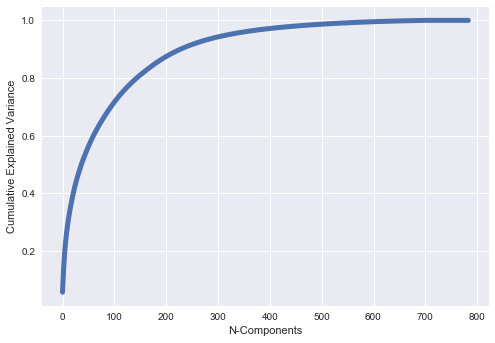

In [21]:
plt.plot(pca_explained_cumsum, linewidth=5)
plt.xlabel('N-Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

80 % of information is preserved by just around 150 feature/components

## t-SNE on MNIST using scikit-learn


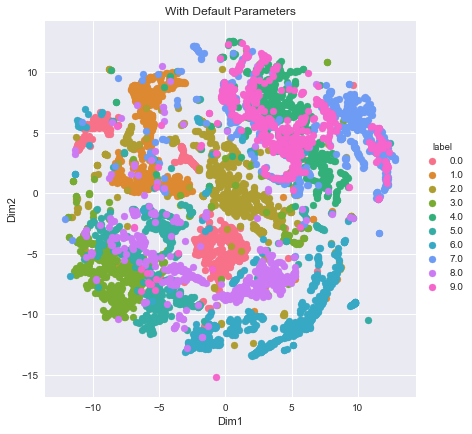

In [34]:
from sklearn.manifold import TSNE

#Taking only n points as t-SNE takes lot of 42k points
n = 5000
sh_data = std_data[0:n,:]
sh_label = labels[0:n]

#Performing TSNE on data and transforming the input data
embedded_data = TSNE(n_components=2,random_state=0).fit_transform(sh_data)
#Default Parameters:-
# the number of components = 2 : Dimension of the embedded space
# default perplexity = 30 :The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity. Consider selecting a value between 5 and 50. The choice is not extremely critical since t-SNE is quite insensitive to this parameter.
# default learning rate = 200 : The learning rate for t-SNE is usually in the range [10.0, 1000.0]. If the learning rate is too high, the data may look like a ‘ball’ with any point approximately equidistant from its nearest neighbours. If the learning rate is too low, most points may look compressed in a dense cloud with few outliers. If the cost function gets stuck in a bad local minimum increasing the learning rate may help.
# default n_iter = 1000 :Maximum number of iterations for the optimization
# print(embedded_data.shape)
# print(sh_data.shape)


# Merged inputs with labels
final_data = np.concatenate((embedded_data,sh_label),axis=1)

df = pd.DataFrame(data=final_data,columns=["Dim1","Dim2","label"])
# Ploting the result of tsne using seaborne and matplotlib.pyplot
sns.FacetGrid(df,hue="label",size=6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.title("With Default Parameters")
plt.show()

In [9]:
from sklearn.manifold import TSNE

#Taking only n points as t-SNE takes lot of 42k points
n = 12000
sh_data = std_data[0:n,:]
sh_label = labels[0:n]
embedded_data = TSNE(n_components=2,random_state=0,perplexity=30,n_iter=3000).fit_transform(sh_data)
# Merged inputs with labels
final_data = np.concatenate((embedded_data,sh_label),axis=1)

df = pd.DataFrame(data=final_data,columns=["Dim1","Dim2","label"])

sns.FacetGrid(df,hue="label",size=6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.title("With Perplexity 40")
plt.show()

ValueError: all the input arrays must have same number of dimensions

In [ ]:
from sklearn.manifold import TSNE

#Taking only n points as t-SNE takes lot of 42k points
n = 15000
sh_data = std_data[0:n,:]
sh_label = labels[0:n]

embedded_data = TSNE(n_components=2,random_state=0,perplexity=35,n_iter=6000).fit_transform(sh_data)
# Merged inputs with labels
final_data = np.concatenate((embedded_data,sh_label),axis=1)

df = pd.DataFrame(data=final_data,columns=["Dim1","Dim2","label"])

sns.FacetGrid(df,hue="label",size=6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.title("With Perplexity 35 and No. of Iters 4000")
plt.show()